#경사하강법의 이해


* 함수 값이 낮아지는 방향으로 독립 변수 값을 변형시켜가면서 함수 값을 최소로 만드는 독립 변수 값을 찾는 방법으로, 함수의 형태가 convex 할 때 활용 가능

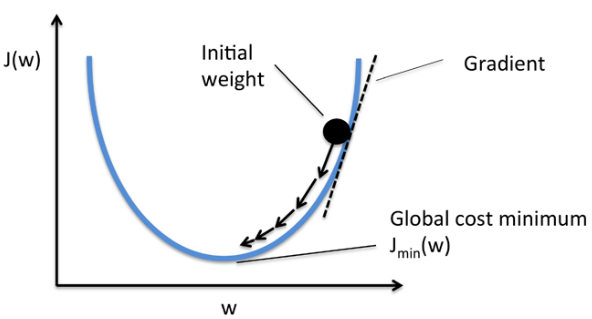

Convex한 함수의 최소 값을 찾을 때, '기울기 = 0'인 지점을 찾으면 되지 않을까? 
* 실제 분석에서 보게 되는 함수들은 그 형태가 매우 복잡하여 미분 계수와 그 근을 찾는 것이 어려움
* 미분 계산 과정을 컴퓨터로 구현하는 것보다 경사하강법을 구현하는 것이 훨씬 쉬움
* 데이터 양이 매우 많을 경우, 경사하강법과 같은 순차적 방법이 효율적임

경사 하강법의 개념을 활용하여서 Backpropagation(역전파)가 수행 됨
* 단순 경사 하강법만을 활용해서는 MLP 모델을 학습시킬 수 없음
  * 경사 하강법을 사용하기 위해서는 MLP 모델 각 weight들의 편미분 값을 구해야하는데, 이를 효율적으로 구하기 위해 Chain rule 을 활용한 것이 역전파라고 볼 수 있음
  

##경사하강법(Gradient Descent) 구현 (단항식)

##1. 데이터 생성

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(2022)

In [9]:
w = 0.3 
b = 0.5
size = 100
n = 0.01

In [10]:
x= np.random.rand(size)

x

array([0.00935861, 0.49905781, 0.11338369, 0.04997402, 0.68540759,
       0.48698807, 0.89765723, 0.64745207, 0.89696312, 0.72113493,
       0.83135342, 0.82756807, 0.83357958, 0.95704434, 0.36804444,
       0.49483763, 0.33950947, 0.61942933, 0.97752964, 0.09643308,
       0.74420621, 0.29249947, 0.29867535, 0.75247347, 0.01866373,
       0.52373744, 0.86443585, 0.38884284, 0.21219185, 0.4751807 ,
       0.56467242, 0.3494293 , 0.97590863, 0.03782004, 0.79426969,
       0.3578826 , 0.74796395, 0.91450931, 0.37266242, 0.96488347,
       0.08138577, 0.04245099, 0.29679603, 0.36370363, 0.49025518,
       0.66851874, 0.67341463, 0.57210064, 0.08059224, 0.89833126,
       0.03838853, 0.78219442, 0.03665636, 0.26718385, 0.20522385,
       0.25889443, 0.93261529, 0.00812491, 0.40347318, 0.89410221,
       0.20420903, 0.02177601, 0.69716712, 0.19102335, 0.54643299,
       0.6032252 , 0.98879386, 0.09244605, 0.06428732, 0.98795199,
       0.45210802, 0.85391119, 0.40144507, 0.38820644, 0.88440

In [11]:
y = w*x+b

y

array([0.50280758, 0.64971734, 0.53401511, 0.51499221, 0.70562228,
       0.64609642, 0.76929717, 0.69423562, 0.76908894, 0.71634048,
       0.74940603, 0.74827042, 0.75007388, 0.7871133 , 0.61041333,
       0.64845129, 0.60185284, 0.6858288 , 0.79325889, 0.52892992,
       0.72326186, 0.58774984, 0.58960261, 0.72574204, 0.50559912,
       0.65712123, 0.75933075, 0.61665285, 0.56365755, 0.64255421,
       0.66940173, 0.60482879, 0.79277259, 0.51134601, 0.73828091,
       0.60736478, 0.72438919, 0.77435279, 0.61179873, 0.78946504,
       0.52441573, 0.5127353 , 0.58903881, 0.60911109, 0.64707655,
       0.70055562, 0.70202439, 0.67163019, 0.52417767, 0.76949938,
       0.51151656, 0.73465833, 0.51099691, 0.58015515, 0.56156715,
       0.57766833, 0.77978459, 0.50243747, 0.62104195, 0.76823066,
       0.56126271, 0.5065328 , 0.70915014, 0.557307  , 0.6639299 ,
       0.68096756, 0.79663816, 0.52773382, 0.5192862 , 0.7963856 ,
       0.63563241, 0.75617336, 0.62043352, 0.61646193, 0.76532

In [12]:
y.shape

(100,)

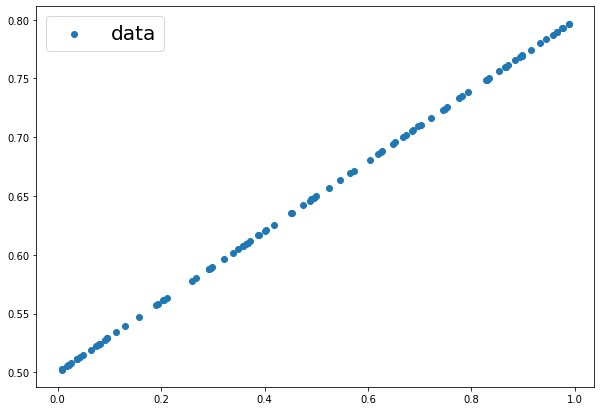

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, label='data')
plt.legend(fontsize=20)
plt.show()

In [14]:
noise = np.random.uniform(-abs(n), abs(n), size=y.shape)

noise

array([-0.00102182,  0.00019184,  0.00549   , -0.00430373, -0.0084329 ,
        0.00831104,  0.00285962,  0.00634362,  0.00273286,  0.00542571,
       -0.00589571,  0.00496312, -0.0066856 , -0.00443536, -0.00230735,
       -0.00497825, -0.00517505,  0.00682935, -0.00958137,  0.00789837,
       -0.0012774 , -0.0046804 ,  0.00810488,  0.00119631, -0.00781938,
        0.00403027,  0.00645422,  0.00477012,  0.00975788, -0.00681639,
        0.00976159,  0.0045257 ,  0.00200188, -0.00683271, -0.00853331,
       -0.00564821, -0.00391436,  0.00614051, -0.00269873,  0.00737523,
       -0.00794176, -0.00038897, -0.0049214 , -0.00086032, -0.00064928,
       -0.00343586, -0.0099175 , -0.00821847, -0.00495295,  0.00390618,
       -0.00041832,  0.00961231, -0.00807194, -0.00793799,  0.00257845,
        0.00875486,  0.00645451,  0.00839623, -0.00548171,  0.00807619,
       -0.005548  , -0.00097481,  0.00464115, -0.00788574,  0.00158646,
       -0.00147675, -0.00839482, -0.00401734, -0.00267781, -0.00

In [15]:
yy = y + noise #y값에 노이즈 추가

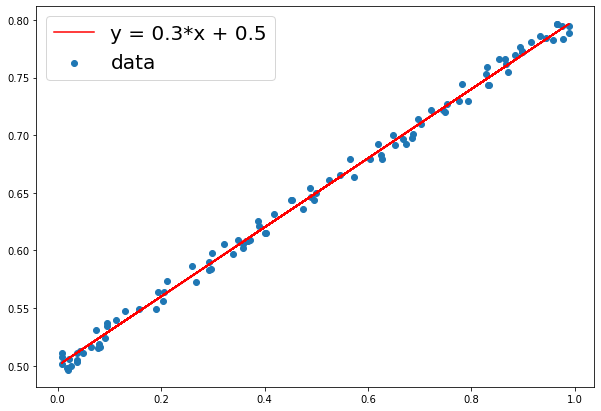

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') #직선 
plt.scatter(x, yy, label='data')
plt.legend(fontsize=20)
plt.show()

* outlier 추가

In [17]:
yy[0] = 0.75
yy[5] = 0.75


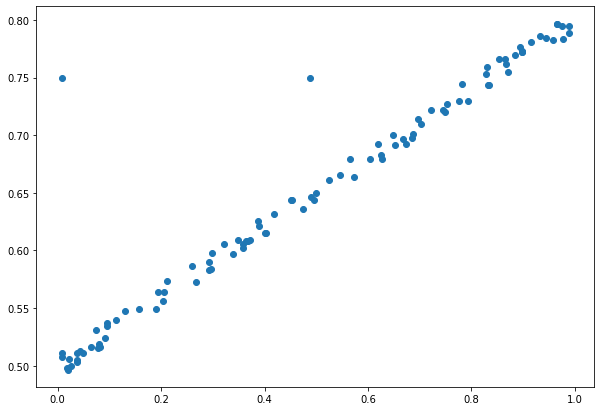

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(x, yy)
plt.show()

##2. 가중치 초기 값 및 예측 값 설정

In [19]:
w = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

In [20]:
w,b 

(0.3280564572351994, -0.36063590364237075)

In [21]:
y_hat = w*x+b

In [22]:
y_hat.shape

(100,)

##3. 오차(Error) 정의

* Mean Squared Error(MSE): $\frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i-Y_i)^2$

In [23]:
error = (y_hat-yy)**2

In [24]:
error.shape

(100,)

##4-1. 경사하강법(Gradient Descent) 구현 (단항식)

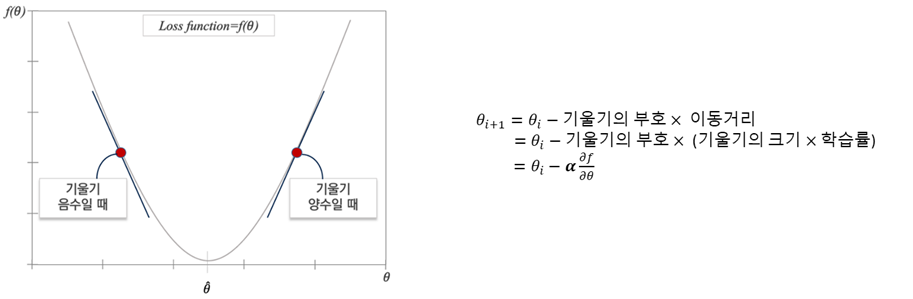

$\frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i-Y_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (wx_i+b-Y_i)^2 $ 

* 손실함수를 w에 대해서 편미분(기울기): $2(wx_i+b-Y_i)*x_i = 2(예측 값 - 실제 값) * x_i$
* 손실함수를 b에 대해서 편미분(기울기): $2(wx_i+b-Y_i)*x_i = 2(예측 값 - 실제 값)$

* 업데이트 할 w: learning_rate * ((y실제 - y예측) * x)평균
* 업데이트 할 b: learning_rate * ((y실제 - y예측))평균


In [25]:
# 최대 반복 횟수
num_epoch = 5000

In [26]:
# 학습율(learning_rate)
lr = 0.5

In [27]:
errors = []

#가중치초기화
w= np.random.uniform(-1.0, 1.0)
b= np.random.uniform(-1.0, 1.0)

In [28]:
w,b

(0.3703507489392912, 0.03776498924404326)

In [29]:
for epoch in range(num_epoch):
  y_hat = w*x + b

  error = ((y_hat-yy)**2).mean()

  if error < 0.0005: 
    break

  w = w- lr * ((y_hat-yy)*x).mean()
  b = b- lr* (y_hat-yy).mean()

  errors.append(error)

  if epoch % 5 == 0 :
    print(f"{epoch:2} w= {w:.5f}, b= {b: .5f}, error = {error: .5f}")

print('-----' * 15)
print(f"{epoch:2} w= {w:.5f}, b= {b: .5f}, error = {error: .5f}")


 0 w= 0.47111, b=  0.25361, error =  0.18774
 5 w= 0.49068, b=  0.40140, error =  0.00524
10 w= 0.45390, b=  0.42195, error =  0.00372
15 w= 0.42356, b=  0.43797, error =  0.00272
20 w= 0.39885, b=  0.45102, error =  0.00205
25 w= 0.37872, b=  0.46165, error =  0.00161
30 w= 0.36231, b=  0.47031, error =  0.00131
35 w= 0.34895, b=  0.47736, error =  0.00112
40 w= 0.33807, b=  0.48311, error =  0.00099
45 w= 0.32920, b=  0.48779, error =  0.00090
50 w= 0.32198, b=  0.49160, error =  0.00085
55 w= 0.31610, b=  0.49471, error =  0.00081
60 w= 0.31130, b=  0.49724, error =  0.00078
65 w= 0.30740, b=  0.49930, error =  0.00077
70 w= 0.30422, b=  0.50098, error =  0.00075
75 w= 0.30163, b=  0.50235, error =  0.00075
80 w= 0.29952, b=  0.50346, error =  0.00074
85 w= 0.29780, b=  0.50437, error =  0.00074
90 w= 0.29640, b=  0.50511, error =  0.00074
95 w= 0.29526, b=  0.50571, error =  0.00074
100 w= 0.29433, b=  0.50620, error =  0.00073
105 w= 0.29357, b=  0.50660, error =  0.00073
110 w= 0

* 학습 진행 시각화

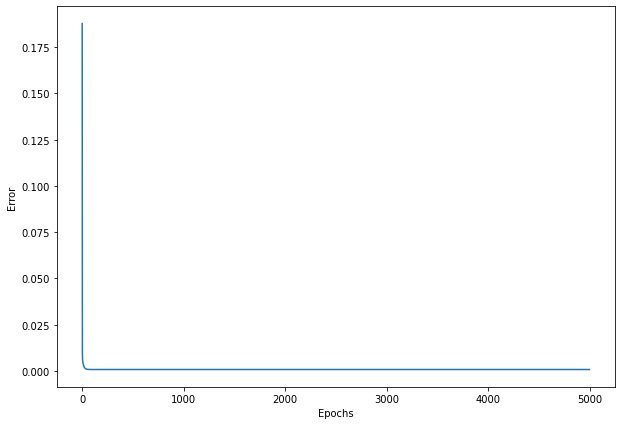

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

* 적합 직선 시각화

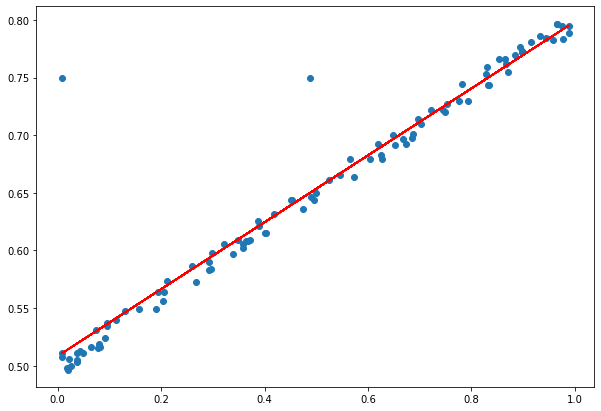

In [34]:
h = w*x+b

plt.figure(figsize=(10, 7))
plt.plot(x, h, color='r', label=f'y = {w}*x + {b}')
plt.scatter(x, yy)
plt.show()


##4-2. 경사하강법(Gradient Descent) 구현 (다항식)

샘플 데이터를 생성

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서 구현

다항식에서는 X의 갯수 만큼, W 갯수도 늘어남

다만, bias (b)의 계수는 1개인 점에 유의

In [35]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [36]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

In [37]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

In [38]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
lr=0.5

w1 = np.random.uniform(-1.0, 1.0)
w2 = np.random.uniform(-1.0, 1.0)
w3 = np.random.uniform(-1.0, 1.0)

b1 = np.random.uniform(-1.0, 1.0)
b2 = np.random.uniform(-1.0, 1.0)
b3 = np.random.uniform(-1.0, 1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
    
    # 미분값 적용 (Gradient)
    w1 = w1 - lr * ((y_hat - y) * x1).mean()
    w2 = w2 - lr * ((y_hat - y) * x2).mean()
    w3 = w3 - lr * ((y_hat - y) * x3).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    b = b - lr * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print(f"{epoch:2} w1 = {w1:.5f}, w2 = {w2:.5f}, w3 = {w3:.5f}, b = {b:.5f} error = {error:.5f}")
        

print("----" * 15)
print(f"{epoch:2} w1 = {w1:.5f}, w2 = {w2:.5f}, w3 = {w3:.5f}, b = {b:.5f} error = {error:.5f}")

 0 w1 = 0.87905, w2 = -0.17486, w3 = -0.50304, b = 1.24378 error = 1.60815
 5 w1 = 0.78507, w2 = -0.04792, w3 = -0.29733, b = 1.22387 error = 0.12794
10 w1 = 0.68459, w2 = 0.03235, w3 = -0.14733, b = 1.15675 error = 0.09114
15 w1 = 0.60375, w2 = 0.09978, w3 = -0.01992, b = 1.09769 error = 0.06512
20 w1 = 0.53882, w2 = 0.15661, w3 = 0.08830, b = 1.04574 error = 0.04667
25 w1 = 0.48677, w2 = 0.20463, w3 = 0.18022, b = 1.00006 error = 0.03355
30 w1 = 0.44511, w2 = 0.24533, w3 = 0.25828, b = 0.95991 error = 0.02419
35 w1 = 0.41187, w2 = 0.27993, w3 = 0.32458, b = 0.92464 error = 0.01749
40 w1 = 0.38542, w2 = 0.30942, w3 = 0.38089, b = 0.89365 error = 0.01269
45 w1 = 0.36443, w2 = 0.33464, w3 = 0.42871, b = 0.86643 error = 0.00923
50 w1 = 0.34785, w2 = 0.35625, w3 = 0.46932, b = 0.84253 error = 0.00674
55 w1 = 0.33481, w2 = 0.37482, w3 = 0.50382, b = 0.82154 error = 0.00493
60 w1 = 0.32461, w2 = 0.39082, w3 = 0.53312, b = 0.80311 error = 0.00362
65 w1 = 0.31667, w2 = 0.40463, w3 = 0.55802, 

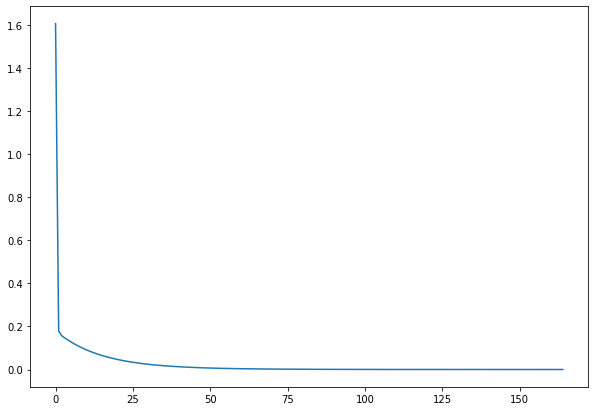

In [39]:
plt.figure(figsize=(10, 7))

plt.plot(errors)

## 5. 가중치(w1, w2, w3) 값들의 변화량 시각

* w1 변화량

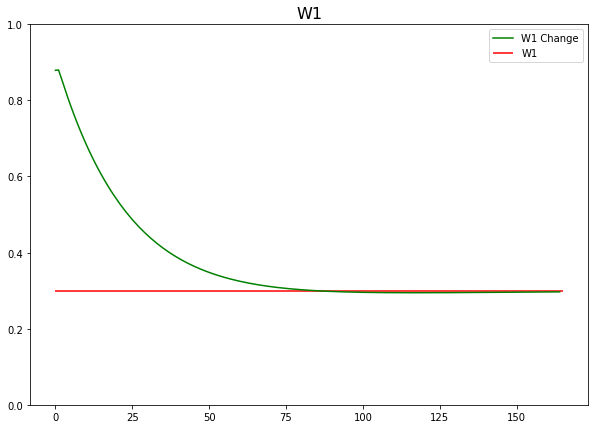

In [40]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

* w2 변화량

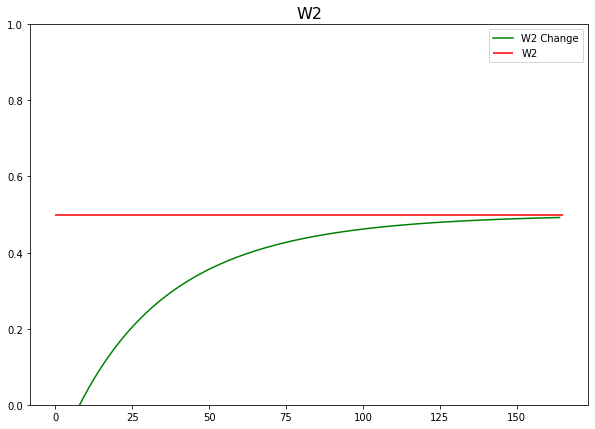

In [41]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

* w3 변화량

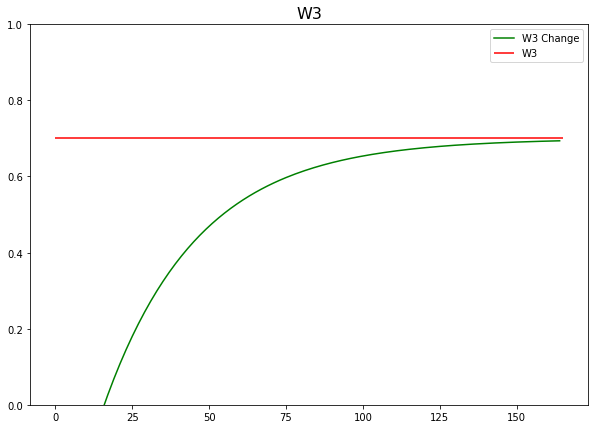

In [42]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()